In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("fake_or_real_news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
# getting the dependent features 
Y = df["label"]
Y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [9]:
# getting the independent features by dropping 'label' column
# X = df.drop('label',axis = 1)
# X = df.drop('Unnamed: 0', axis = 1)
X

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [10]:
# importing important library for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
messages = df.copy()
messages

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [12]:
messages.drop('Unnamed: 0',axis = 1,inplace = True)
messages.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
messages['title'][4]

'The Battle of New York: Why This Primary Matters'

In [14]:
messages['text'][8]

'Hillary Clinton and Donald Trump made some inaccurate claims during an NBC “commander-in-chief” forum on military and veterans issues:\n\n• Clinton wrongly claimed Trump supported the war in Iraq after it started, while Trump was wrong, once again, in saying he was against the war before it started.\n\n•\xa0Trump said that President Obama set a “certain date” for withdrawing troops from Iraq, when that date was set before Obama was sworn in.\n\n•\xa0Trump said that Obama’s visits to China, Saudi Arabia and Cuba were “the first time in the history, the storied history of Air Force One” when “high officials” of a host country did not appear to greet the president. Not true.\n\n•\xa0Clinton said that Trump supports privatizing the Veterans Health Administration. That’s false. Trump said he supports allowing veterans to seek care at either public or private hospitals.\n\n•\xa0Trump said Clinton made “a terrible mistake on Libya” when she was secretary of State. But, at the time, Trump als

In [15]:
#text preprocessing 
import time
start = time.time()

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0,len(messages)):
    result = re.sub('[^a-zA-Z]',' ',messages['text'][i])
    result = result.lower()
    result = result.split()
    result = [lemmatizer.lemmatize(word) for word in result if word not in stopwords.words('english')]
    result = " ".join(result)
    corpus.append(result)
end = time.time()
print("The time of execution of above program is :", end-start)

The time of execution of above program is : 1044.6338574886322


In [16]:
corpus[5]

'immigrant grandparent year ago arrived new york city iran grew mainly central new jersey american kid playing little league raritan red sox soccer raritan rover travelled family ancestral land eight old enough understand iranian lost liberty freedom saw abject despair people desperate attempt bring change ushered nationalist tyrant led ayatollah khomeini witnessed year iran changed course life age wanting help preserve blessing liberty freedom enjoy america enlisted u navy rise donald trump nationalist alt right movement come feel value sought protect jeopardy iran theocratic fundmentalists sowed division hatred outsider westerner christian religious minority america right wing seems stolen passage directly playbook spread hatred immigrant particularly muslim one form nationalistic bigotry islamophobia threatens heart nation chose serve military protect viewed sacred foundational value liberty equality democracy year later joined force fellow veteran fight sacred value time right home

In [17]:
# Tfidf Vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_v = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))
X = Tfidf_v.fit_transform(corpus).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06608863, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.02543783,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
X.shape

(6335, 5000)

In [19]:
y = messages['label']
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [20]:
# Dividing the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 0)


In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5068, 5000), (1267, 5000), (5068,), (1267,))

In [22]:
Tfidf_v.get_feature_names()[:20]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abdullah',
 'abedin',
 'ability',
 'able',
 'abortion',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'absurd',
 'abuse',
 'academic',
 'academy',
 'accept',
 'acceptable',
 'acceptance']

In [23]:
Tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [24]:
count_df = pd.DataFrame(X_train, columns = Tfidf_v.get_feature_names())
count_df.head(20)

,abandon,abandoned,abc,abc news,abdullah,abedin,ability,able,abortion,abroad,...,york time,young,young people,younger,youth,youtube,zero,zika,zionist,zone
0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.030485,0.000000,0.0,0.000000,...,0.000000,0.028043,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.019268,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.062442,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.092690,0.021002,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.028294
5,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.043180,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
6,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
7,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
8,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.020357,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
9,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.019287,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [25]:
# plotting confusion matrix

In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinomial Naive Bayes Algorithm - Good for text data

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [29]:
from sklearn import metrics 
import numpy as np
import itertools


accuracy : 0.882
Confusion matrix, without normalization


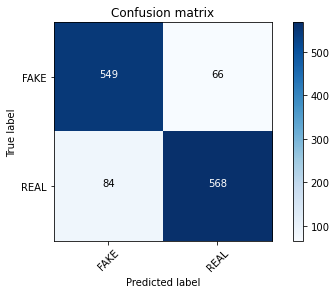

In [31]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE','REAL'])

In [34]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8816101026045777

# Passive Aggresive Algorithm - Works well with text data

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix

linear_clf = PassiveAggressiveClassifier()

accuracy : 0.923
Confusion matrix, without normalization


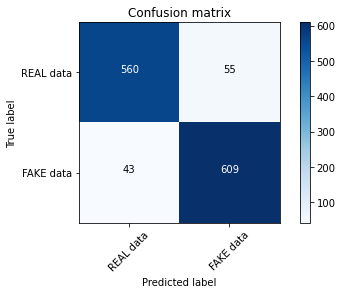

In [45]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('accuracy : %0.3f' %score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm , classes = ['REAL data','FAKE data'])